# 01 - Problem (case study)
    Data Description.
    Goal.
# 02 - Getting Data
    Read the .csv file.
# 03 - Cleaning/Wrangling/EDA
    Change headers names.
    Deal with NaN values.
    Categorical Features.
    Numerical Features.
    Exploration.
# 04 - Processing Data
    Dealing with outliers.
    Normalization.
    Encoding Categorical Data.
    Splitting into train set and test set.
# 05 - Modeling
    Apply model.
# 06 - Model Validation
    R2.
    MSE.
    RMSE.
    MAE.
# 07 - Reporting
    Present results.

#  Problem (case study)
### Data - customer marketing of car insurance
### The goal - to predict the value of Total Claim Amount 

# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy import stats

# Getting Data, change headers names, remove dependent value

In [2]:
file = pd.read_csv("marketing_customer_analysis.csv")
file.columns = file.columns.str.lower().str.replace(" ","_")
file.rename(columns = {"employmentstatus" : "employment_status"}, inplace = True)
#y_dependent = file["total_claim_amount"]
#file.drop(columns = "total_claim_amount", inplace = True)
display(file.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning/Wrangling/EDA

### Deal with NaN values.

In [3]:
nan_file = file[file.isna().any(axis=1)]
nan_file.head()  # it seems that the file dorsn't have any Nan values. Let's check again.

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [4]:
display(file.isna().any(axis=1))
# This also shows that the file is free of NaN values.

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

### Check for duplicates

In [5]:
display(file.shape)
file.drop_duplicates()
display(file.shape) # there are no duplicates

(9134, 24)

(9134, 24)

### Checking value types

In [6]:
display(file.dtypes) 
# The datatype in each column is as expected and 
#there is a value of one type in each column, no need to check and change value types

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

### Statistical summary of columns

In [7]:
file.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Categorical Features.

     Let's drop some unnecessary categorical columns.

In [8]:
file.drop(columns = ["customer", "policy_type", "effective_to_date", "renew_offer_type"], inplace = True)
file.drop_duplicates()
display(file.shape) # there are still no duplicates after removing the unique ID

(9134, 20)

    Counts of unique values in each categorical column

In [9]:
objects = list(file.select_dtypes(object).columns)
display(file[objects].nunique())  
object_columns = file.select_dtypes(object)
display(object_columns.head())
# The count of unique categorical values in columns is acceptable.
# There aren't columns which have a super big amount of unique values

state                5
response             2
coverage             3
education            5
employment_status    5
gender               2
location_code        3
marital_status       3
policy               9
sales_channel        4
vehicle_class        6
vehicle_size         3
dtype: int64

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Agent,Four-Door Car,Medsize


### Plotting the distributions

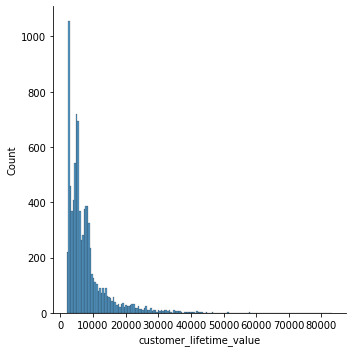

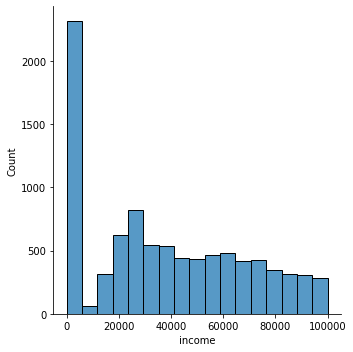

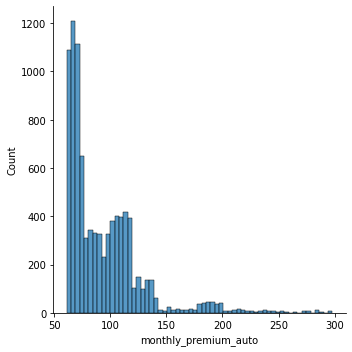

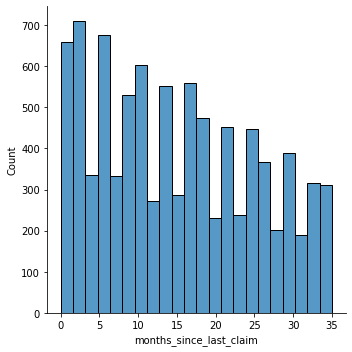

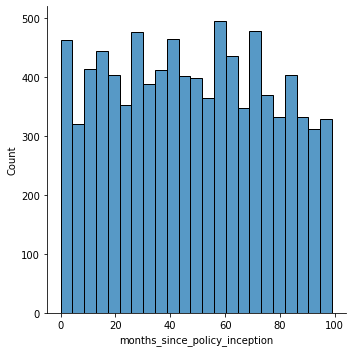

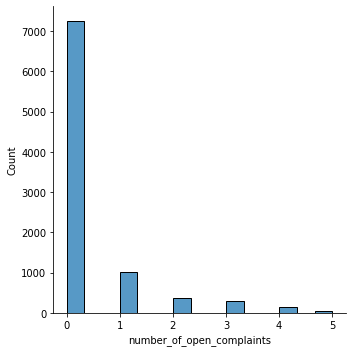

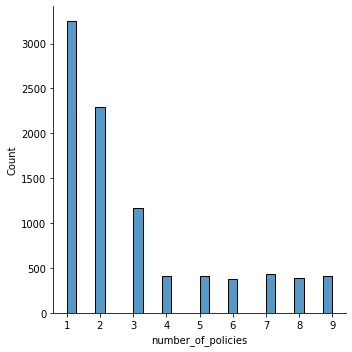

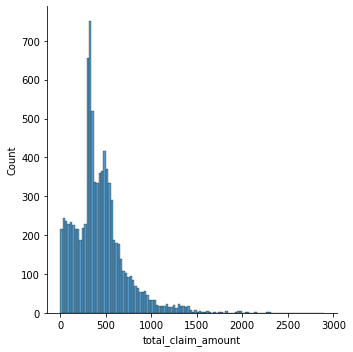

In [10]:
numcols = file.select_dtypes(np.number)
numbers_col = list(numcols.columns)
for col in numcols:
    sns.displot(numcols, x = col)
    plt.show()

##### To deal with a lot of 0 values in "income" column, I've decided to drop them from the current dataset and to create a separate model, based on  a population of people with 0 income.

In [11]:
income_0 = numcols[numcols.income == 0] # the population of people without income
income_non_zero = numcols[numcols.income != 0] # the population of people with income
display(numcols.shape)
display(numcols.shape[0] == income_0.shape[0] + income_non_zero.shape[0])
display(income_0.head())
display(income_non_zero.head())

(9134, 8)

True

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,6979.535903,0,94,13,42,0,8,1131.464935
3,7645.861827,0,106,18,65,0,7,529.881344
7,7216.100311,0,101,0,68,0,4,363.029680
10,4738.992022,0,67,23,5,0,3,482.400000
11,8197.197078,0,110,27,87,0,3,528.000000


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000


### Numerical Features

    Box plots of numerical columns

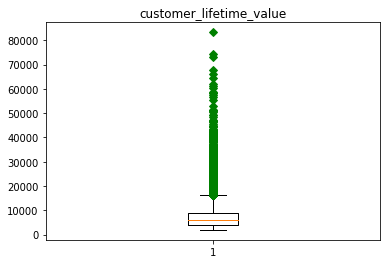

None

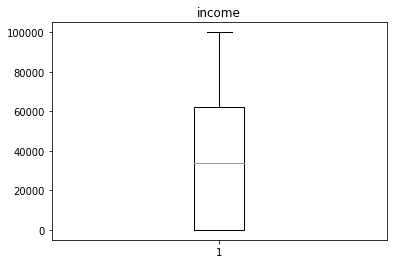

None

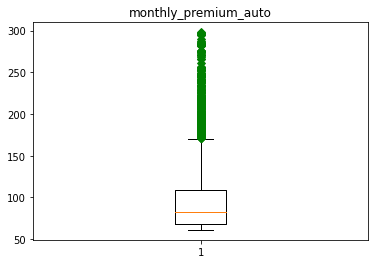

None

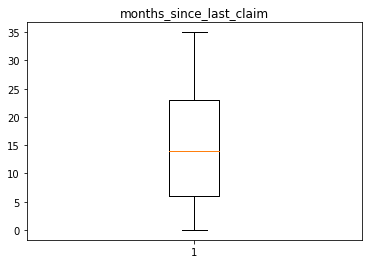

None

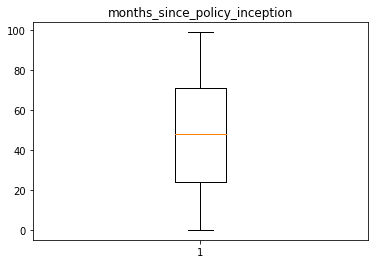

None

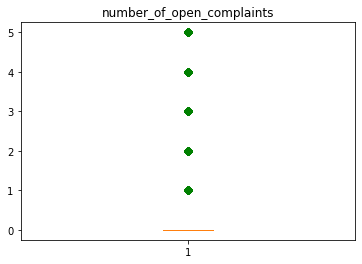

None

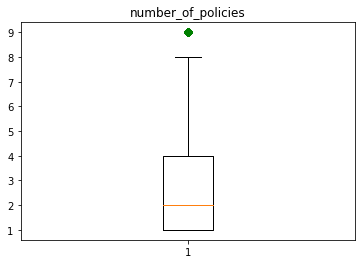

None

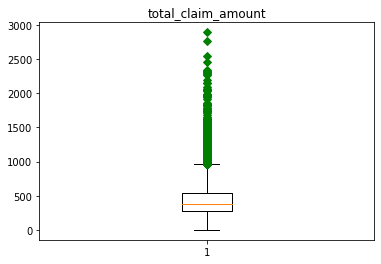

None

In [12]:
columns = income_non_zero.columns

def get_boxplot(dataframe, col):
    fig1, ax1 = plt.subplots()
    ax1.set_title(col)
    ax1.boxplot(dataframe[col], 0, 'gD')
    plt.show()

for col in columns:
    display(get_boxplot(numcols, col))

### Checking correlation matrix and removing irrelevant features

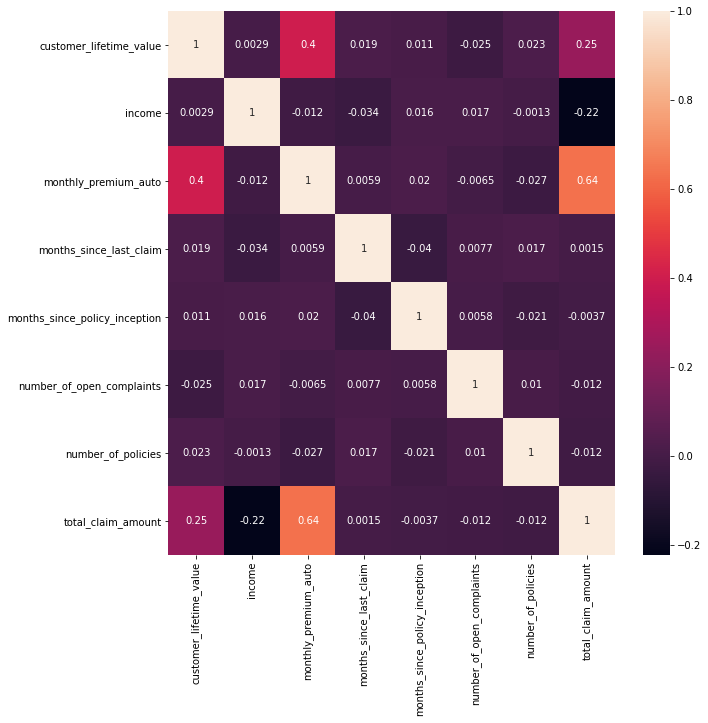

In [13]:
# Plot Pearson Correlation Heatmap.
pearson_corr_matrix = income_non_zero.corr()
fig, ax = plt.subplots(figsize = (10,10))c
ax = sns.heatmap(pearson_corr_matrix, annot = True)
plt.show()

#### The heatmap has shown, that the dependent variable highly correlates with columns Customer Lifetime Value and Monthly Premium Auto. But, the latter values also highly correlate, so I can discard one of them and deal with only one numerical column - Monthly Premium Auto. 
#### Futhermore, the heatmap shows, that the Income column doesn't correlate with th edependent value at all. Therefore, I can discard my idea to build two separate models on two populations based on presense or abscence of income, and builf one model, not regarding income at all.

In [14]:
y_dependent = file["total_claim_amount"]
x_numerical_independent = file["monthly_premium_auto"]

### Dummification of the categorical values

In [15]:
objects_dummyfied = pd.get_dummies(object_columns)
display(objects_dummyfied.head())

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### Concatenating numerical and categorical variables to get a full set of independent values.

In [16]:
x_independent = pd.concat([objects_dummyfied, x_numerical_independent], axis = 1)

### Splitting into train set and test set.

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independent, y_dependent, test_size=0.3, random_state=100)

# Modeling and Model Validation

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"MSE: {mse} \nR2: {r2} \nRMSE : {rmse}\nMAE: {mae}")

MSE: 17867.184412399303 
R2: 0.7761958419185047 
RMSE : 133.66818773514998
MAE: 94.69971215040646


# Model Improvement - Trial 1

### Numerical values transformation (box cox)

In [19]:
# Numerical values transformation
x_numerical_independent_transf, lmbda = stats.boxcox(x_numerical_independent)
x_numerical_independent_transf = pd.DataFrame(x_numerical_independent_transf)
display(x_numerical_independent_transf.head())

,0
0,0.685347
1,0.685871
2,0.686039
3,0.686018
4,0.685461


In [20]:
x_independent2 = pd.concat([objects_dummyfied, x_numerical_independent_transf], axis = 1)

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independent2, y_dependent, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"MSE: {mse} \nR2: {r2} \nRMSE : {rmse}\nMAE: {mae}")

MSE: 18733.76160599098 
R2: 0.7653411053943874 
RMSE : 136.8713323015122
MAE: 97.3994642922291


### Error metrics show, that the pecformance of our model did not improve. 
### However, the model performance is higher, when only one numerical column is being used (compared from the model performance in the previous lab)